<a href="https://colab.research.google.com/github/TCB09/202255202117-Teguh/blob/master/klasifikasi_pohon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np


In [2]:
dataset_path = '/content/drive/MyDrive/dataset/dataset'  # Ganti ini


In [3]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 478 images belonging to 4 classes.
Found 117 images belonging to 4 classes.


In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(train_data.num_classes, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 82944)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    10,616,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,636,868 (40.58 MB)

 Trainable params: 10,636,868 (40.58 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 201s 13s/step - accuracy: 0.2896 - loss: 3.6341 - val_accuracy: 0.2991 - val_loss: 1.3827
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.3818 - loss: 1.3244 - val_accuracy: 0.4359 - val_loss: 1.1940
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.6364 - loss: 1.0514 - val_accuracy: 0.4615 - val_loss: 1.1560
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.8287 - loss: 0.6890 - val_accuracy: 0.4786 - val_loss: 1.2071
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step - accuracy: 0.9284 - loss: 0.3231 - val_accuracy: 0.5641 - val_loss: 1.2003
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - accuracy: 0.9945 - loss: 0.1083 - val_accuracy: 0.5385 - val_loss: 1.2699
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - accuracy: 1.0000 - loss: 0.0541 - val_accuracy: 0.5812 - val_loss: 1.5513
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 1.0000 - loss: 0.0204 - val_accuracy: 0.5812 - val_los

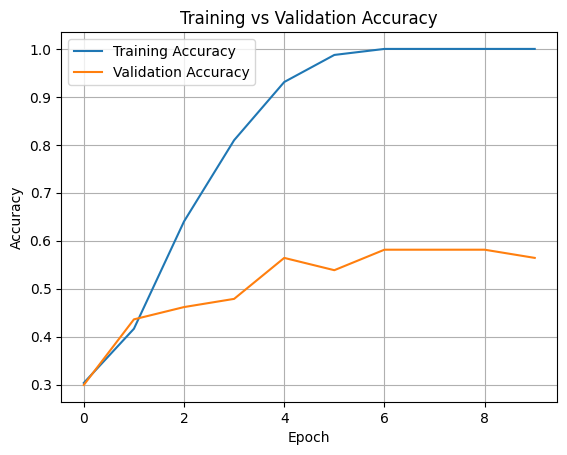

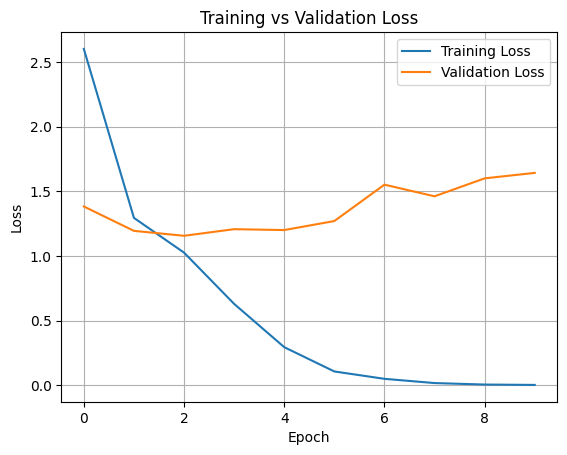

In [7]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.grid(True)
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.grid(True)
plt.show()


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 839ms/step


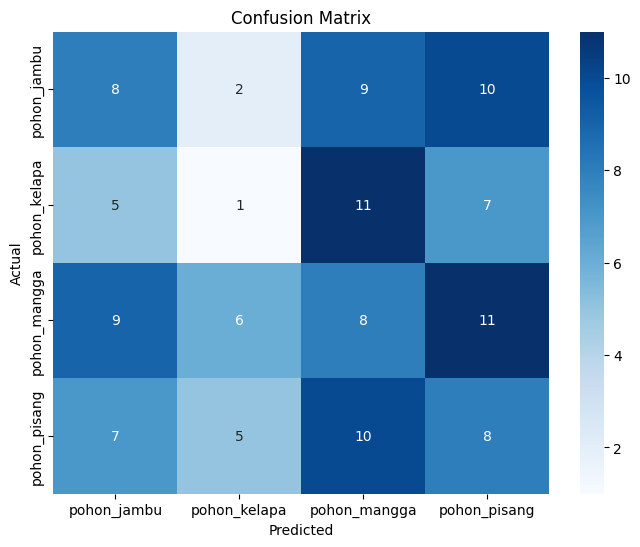

Classification Report:
              precision    recall  f1-score   support

 pohon_jambu       0.28      0.28      0.28        29
pohon_kelapa       0.07      0.04      0.05        24
pohon_mangga       0.21      0.24      0.22        34
pohon_pisang       0.22      0.27      0.24        30

    accuracy                           0.21       117
   macro avg       0.20      0.20      0.20       117
weighted avg       0.20      0.21      0.21       117



In [8]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Ambil label sebenarnya
true_labels = val_data.classes
class_names = list(val_data.class_indices.keys())

# Prediksi
pred_probs = model.predict(val_data)
pred_labels = np.argmax(pred_probs, axis=1)

# Confusion Matrix
cm = confusion_matrix(true_labels, pred_labels)

# Plot
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(true_labels, pred_labels, target_names=class_names))


In [9]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    validation_split=0.2
)


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 808ms/step


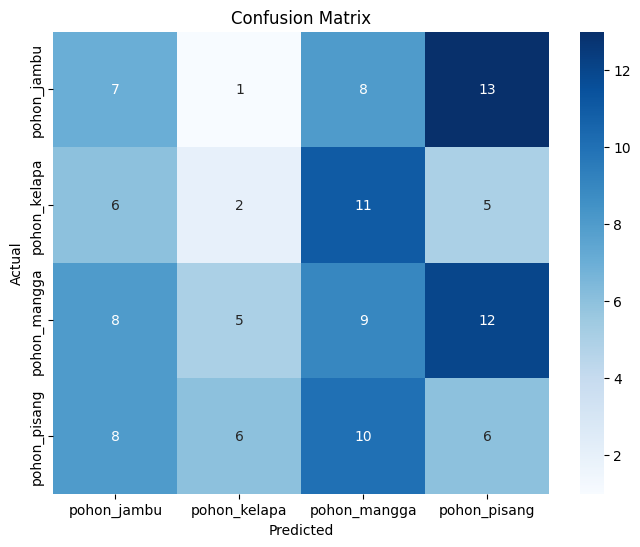

Classification Report:
              precision    recall  f1-score   support

 pohon_jambu       0.24      0.24      0.24        29
pohon_kelapa       0.14      0.08      0.11        24
pohon_mangga       0.24      0.26      0.25        34
pohon_pisang       0.17      0.20      0.18        30

    accuracy                           0.21       117
   macro avg       0.20      0.20      0.19       117
weighted avg       0.20      0.21      0.20       117



In [10]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Ambil label sebenarnya
true_labels = val_data.classes
class_names = list(val_data.class_indices.keys())

# Prediksi
pred_probs = model.predict(val_data)
pred_labels = np.argmax(pred_probs, axis=1)

# Confusion Matrix
cm = confusion_matrix(true_labels, pred_labels)

# Plot
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(true_labels, pred_labels, target_names=class_names))


In [11]:
!pip install bing-image-downloader
import os
from bing_image_downloader import downloader
import shutil


In [12]:
# Perbaikan spesifik untuk baris yang rusak di bing_image_downloader
!sed -i "s/if Path.isdir(image_dir):/if Path(image_dir).is_dir():/g" /usr/local/lib/python3.11/dist-packages/bing_image_downloader/downloader.py


In [13]:
!pip install icrawler


In [18]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Path ke dataset kamu
dataset_path = '/content/drive/MyDrive/dataset/dataset'

# Inisialisasi ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # 20% data validasi
)

# Generator untuk data training
train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

# Generator untuk data validasi
val_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)


Found 478 images belonging to 4 classes.
Found 117 images belonging to 4 classes.


In [21]:
# Compile model (kalau belum di-compile lagi)
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Training model dengan epoch lebih banyak
history = model.fit(
    train_generator,
    epochs=100,  # ← bisa ubah ke 50/100 sesuai keinginan
    validation_data=val_generator
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.9267 - loss: 0.3437 - val_accuracy: 0.5812 - val_loss: 1.1914
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.9989 - loss: 0.0925 - val_accuracy: 0.5385 - val_loss: 1.7190
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 1.0000 - loss: 0.0112 - val_accuracy: 0.5385 - val_loss: 1.7351
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 1.0000 - loss: 0.0020 - val_accuracy: 0.5299 - val_loss: 1.8068
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 1.0000 - loss: 0.0010 - val_accuracy: 0.5299 - val_loss: 1.8444
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - accuracy: 1.0000 - loss: 7.0605e-04 - val_accuracy: 0.5214 - val_loss: 1.8742
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 1.0000 - loss: 4.2190e-04 - val_accuracy: 0.5385 - val_loss: 1.8812
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 34s 2s/step - accuracy: 1.0000 - loss: 2.5959e-04 - val_accuracy

4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step
Classification Report:

              precision    recall  f1-score   support

 pohon_jambu       0.19      0.21      0.20        29
pohon_kelapa       0.18      0.12      0.15        24
pohon_mangga       0.37      0.41      0.39        34
pohon_pisang       0.23      0.23      0.23        30

    accuracy                           0.26       117
   macro avg       0.24      0.24      0.24       117
weighted avg       0.25      0.26      0.25       117



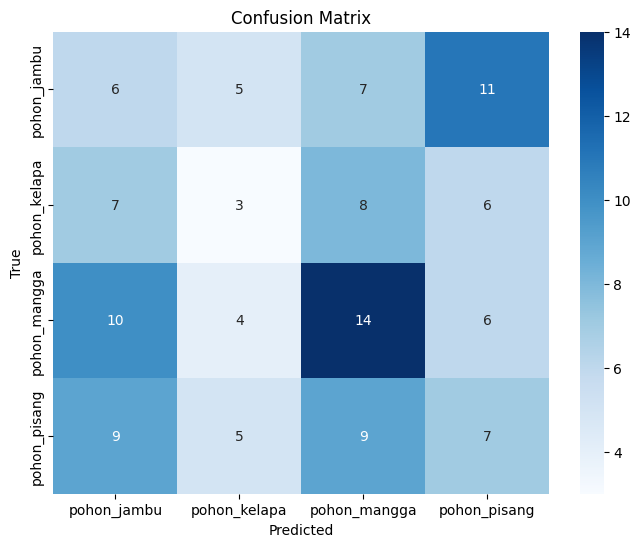

In [22]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Ambil label class
labels = list(train_generator.class_indices.keys())

# Prediksi pada data validasi
val_generator.reset()
y_pred = model.predict(val_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# Label asli
y_true = val_generator.classes

# Classification Report
print("Classification Report:\n")
print(classification_report(y_true, y_pred_classes, target_names=labels))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
